In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
uni = pd.read_csv("PCA.csv")
uni.describe()
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [4]:
# Considering only numerical data 
uni.data = uni.iloc[:,1:]
uni.data.head()
# Converting into numpy array
UNI = uni.data.values
UNI

<ipython-input-4-3aa59f77e3d8>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  uni.data = uni.iloc[:,1:]


array([[ 1310,    89,    22,    13, 22704,    94],
       [ 1415,   100,    25,     6, 63575,    81],
       [ 1260,    62,    59,     9, 25026,    72],
       [ 1310,    76,    24,    12, 31510,    88],
       [ 1280,    83,    33,    13, 21864,    90],
       [ 1340,    89,    23,    10, 32162,    95],
       [ 1315,    90,    30,    12, 31585,    95],
       [ 1255,    74,    24,    12, 20126,    92],
       [ 1400,    91,    14,    11, 39525,    97],
       [ 1305,    75,    44,     7, 58691,    87],
       [ 1380,    94,    30,    10, 34870,    91],
       [ 1260,    85,    39,    11, 28052,    89],
       [ 1255,    81,    42,    13, 15122,    94],
       [ 1081,    38,    54,    18, 10185,    80],
       [ 1375,    91,    14,     8, 30220,    95],
       [ 1005,    28,    90,    19,  9066,    69],
       [ 1360,    90,    20,    12, 36450,    93],
       [ 1075,    49,    67,    25,  8704,    67],
       [ 1240,    95,    40,    17, 15140,    78],
       [ 1290,    75,    50,   

The function scale provides a quick and easy way to perform this operation on a single array-like dataset

The preprocessing module further provides a utility class StandardScaler that implements the Transformer API to compute 
the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 
This class is hence suitable for use in the early steps of a sklearn.pipeline.Pipeline

In [7]:
# Normalizing the numerical data 
# scale will transform data in min-max range of the data, while standardscaler will transform data in range of [-1, 1].
uni_normal = scale(UNI)

In [8]:
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [17]:
pca = PCA()
pca_values = pca.fit_transform(uni_normal)

In [18]:
np.round(pca_values,1)

array([[-1. , -1.1,  0.1,  0.1, -0.1, -0. ],
       [-2.8,  2.3,  0.8,  0.1, -0.1, -0.2],
       [ 1.1,  1.6, -0.3,  1.1, -0.2,  0.3],
       [-0.7, -0. ,  0.1, -0.2, -0.6,  0.1],
       [-0.3, -0.6,  0. ,  0.2,  0. , -0. ],
       [-1.7, -0.3, -0.3,  0. , -0.1, -0. ],
       [-1.2, -0.5, -0. , -0.2,  0.3, -0.1],
       [-0.3, -0.8, -0.5,  0. , -0.5, -0.2],
       [-2.4, -0.4,  0.1, -0.5, -0.2,  0.3],
       [-1.4,  2.1, -0.4, -0.6,  0.2, -0.2],
       [-1.7,  0.1,  0.2,  0.3,  0.2,  0.2],
       [-0.5, -0. , -0.2,  0.2,  0.3, -0.3],
       [ 0. , -1. , -0.5,  0.2,  0.4,  0. ],
       [ 3.2, -0.4, -0.5, -0.5, -0.6, -0.1],
       [-2.2, -0.4, -0.4,  0.4, -0.4,  0.1],
       [ 5.2,  0.8, -0.4, -0.2,  0.2, -0. ],
       [-1.7, -0.3,  0.3, -0.3, -0.2,  0.1],
       [ 4.6, -0.3,  1.5, -0.5, -0.2,  0.1],
       [ 0.8, -0.7,  1.4,  0.8,  0.2, -0.3],
       [-0.1,  0.7,  0.1, -0.5,  0.5,  0.2],
       [ 2. , -0.2, -0.3, -0. ,  0.8,  0.2],
       [-0.5, -0.1, -0.3,  0.1,  0.1, -0. ],
       [ 0

In [19]:
#same as above
pca1 = PCA().fit(uni_normal).transform(uni_normal)
np.round(pca1,1)

array([[-1. , -1.1,  0.1,  0.1, -0.1, -0. ],
       [-2.8,  2.3,  0.8,  0.1, -0.1, -0.2],
       [ 1.1,  1.6, -0.3,  1.1, -0.2,  0.3],
       [-0.7, -0. ,  0.1, -0.2, -0.6,  0.1],
       [-0.3, -0.6,  0. ,  0.2,  0. , -0. ],
       [-1.7, -0.3, -0.3,  0. , -0.1, -0. ],
       [-1.2, -0.5, -0. , -0.2,  0.3, -0.1],
       [-0.3, -0.8, -0.5,  0. , -0.5, -0.2],
       [-2.4, -0.4,  0.1, -0.5, -0.2,  0.3],
       [-1.4,  2.1, -0.4, -0.6,  0.2, -0.2],
       [-1.7,  0.1,  0.2,  0.3,  0.2,  0.2],
       [-0.5, -0. , -0.2,  0.2,  0.3, -0.3],
       [ 0. , -1. , -0.5,  0.2,  0.4,  0. ],
       [ 3.2, -0.4, -0.5, -0.5, -0.6, -0.1],
       [-2.2, -0.4, -0.4,  0.4, -0.4,  0.1],
       [ 5.2,  0.8, -0.4, -0.2,  0.2, -0. ],
       [-1.7, -0.3,  0.3, -0.3, -0.2,  0.1],
       [ 4.6, -0.3,  1.5, -0.5, -0.2,  0.1],
       [ 0.8, -0.7,  1.4,  0.8,  0.2, -0.3],
       [-0.1,  0.7,  0.1, -0.5,  0.5,  0.2],
       [ 2. , -0.2, -0.3, -0. ,  0.8,  0.2],
       [-0.5, -0.1, -0.3,  0.1,  0.1, -0. ],
       [ 0

In [34]:
pca = PCA(n_components = 6)#n_components are the no. of PC we gona select like top 3 columns rest drop
pca_values = pca.fit_transform(uni_normal)

In [35]:
pca_values

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

In [36]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_#explained_variance_ratio_ is the variacle % of each PC or column or dimension
var*100

array([76.86808432, 13.11360248,  4.77603096,  2.72966846,  2.07176996,
        0.44084382])

In [37]:
# Cumulative variance - cumsum is used when we want to calciulate the cumulative sum of array elements over a given axis.
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

In [38]:
pca.components_#pca.components_ is a eigen vector

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

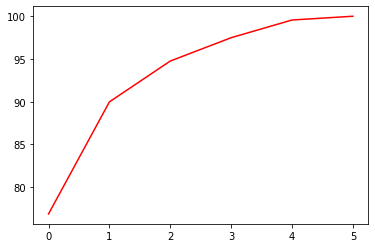

In [39]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")
#here we will find the peak point where we can consider the no. of PCA for furthr analysis 
#we can see that at point 2 the slope gets minimised so we consider 2 columns with 90% of information holding

In [41]:
 pca_values[:,0:1]

array([[-1.00987445],
       [-2.82223781],
       [ 1.11246577],
       [-0.74174122],
       [-0.31191206],
       [-1.69669089],
       [-1.24682093],
       [-0.33874978],
       [-2.37415013],
       [-1.40327739],
       [-1.72610332],
       [-0.45085748],
       [ 0.04023814],
       [ 3.23373034],
       [-2.23626502],
       [ 5.17299212],
       [-1.69964377],
       [ 4.578146  ],
       [ 0.82260312],
       [-0.09776213],
       [ 1.9631826 ],
       [-0.54228894],
       [ 0.53222092],
       [ 3.54869664],
       [-2.30590032]])

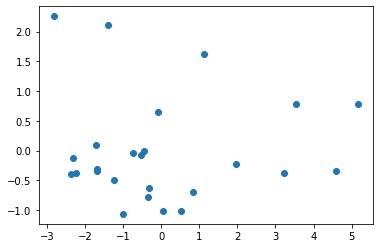

In [42]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [20]:
finalDf = pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), uni[['Univ']]]

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

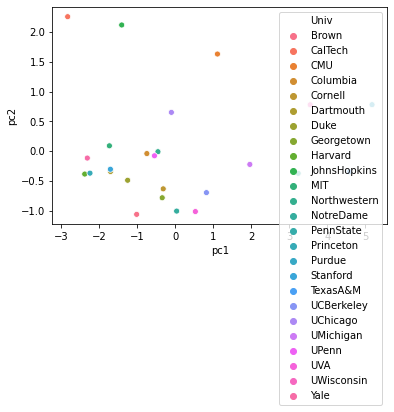

In [29]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Univ')